In [ ]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [41]:
# output from nl
nl_root = Path("../policy_generation/output/litroacp/")
nl_paths = [
    nl_root / "acre_acp.csv",
    nl_root / "collected_acp.csv",
    nl_root / "cyber_acp.csv",
    nl_root / "ibm_acp.csv",
    nl_root / "t2p_acp.csv",
]
# nl_dfs = [pd.read_csv(path) for path in paths]
# nl_df = pd.concat(nl_dfs, ignore_index=True)
# nl_df.describe()

for path in nl_paths:
    df = pd.read_csv(path)
    print(path.stem, df.shape)

acre_acp (499, 5)
collected_acp (129, 5)
cyber_acp (120, 5)
ibm_acp (129, 5)
t2p_acp (367, 5)


In [42]:
# output from xacml
xacml_root = Path("../policy_generation/output/xacml/")
xacml_paths = [
    xacml_root / "xacml3-mli-interface.csv",
    xacml_root / "upperlicl" / "PPS-PIP-Role.csv",
    xacml_root / "upperlicl" / "PPS-VIO-N-Role.csv",
    xacml_root / "upperlicl" / "PPS-VIO-Role.csv",
    xacml_root / "upperlicl" / "RPS-PIP-Role.csv",
    xacml_root / "upperlicl" / "RPS-VIO-N-Role.csv",
    xacml_root / "upperlicl" / "RPS-VIO-Role.csv",
    xacml_root / "upperlicl" / "permission-cci-operations.csv",
    xacml_root / "upperlicl" / "permission-mli-replanning-vlink-operations.csv",
    xacml_root / "upperlicl" / "permission-mli-replanning-vr-it-operations.csv",
    xacml_root / "upperlicl" / "permission-mli-vi-operations.csv",
    xacml_root / "upperlicl" / "permission-mli-vi-request-operations.csv",
    xacml_root / "upperlicl" / "permission-ros-notifications.csv",
    xacml_root / "upperlicl" / "permission-sli-operations.csv",
]

for path in xacml_paths:
    df = pd.read_csv(path)
    print(path.stem, df.shape)

xacml3-mli-interface (1, 5)
PPS-PIP-Role (1, 5)
PPS-VIO-N-Role (1, 5)
PPS-VIO-Role (1, 5)
RPS-PIP-Role (1, 5)
RPS-VIO-N-Role (1, 5)
RPS-VIO-Role (1, 5)
permission-cci-operations (1, 5)
permission-mli-replanning-vlink-operations (1, 5)
permission-mli-replanning-vr-it-operations (1, 5)
permission-mli-vi-operations (1, 5)
permission-mli-vi-request-operations (1, 5)
permission-ros-notifications (1, 5)
permission-sli-operations (1, 5)


([0, 1, 2, 3, 4],
 [Text(0, 0, 'acre_acp'),
  Text(1, 0, 'collected_acp'),
  Text(2, 0, 'cyber_acp'),
  Text(3, 0, 'ibm_acp'),
  Text(4, 0, 't2p_acp')])

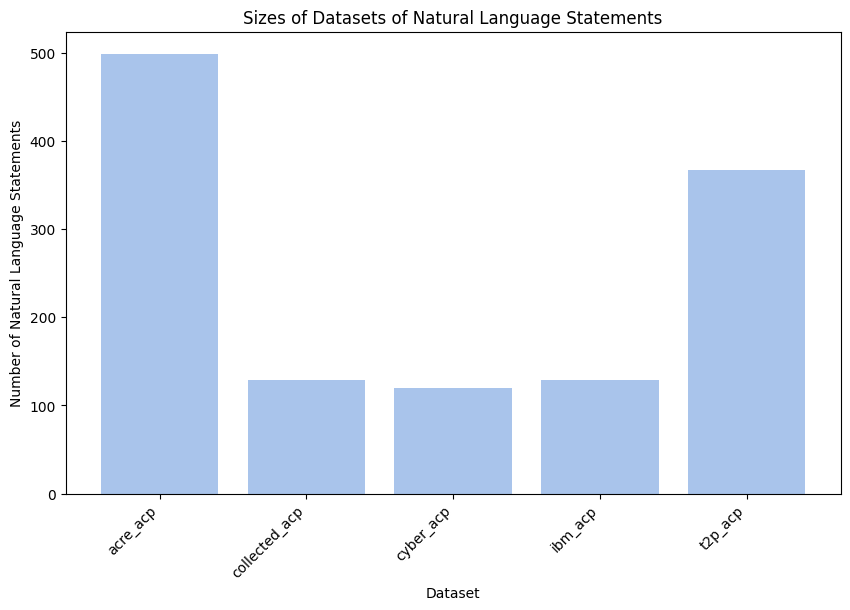

In [61]:
labels = [path.stem for path in nl_paths]
sizes = []
for path in nl_paths:
    df = pd.read_csv(path)
    sizes.append(df.shape[0])
plt.figure(figsize=(10, 6))
plt.bar(labels, sizes, color="#a9c4eb")
plt.xlabel("Dataset")
plt.ylabel("Number of Natural Language Statements")
plt.title("Sizes of Datasets of Natural Language Statements")
plt.xticks(rotation=45, ha="right")

Text(0.5, 1.0, 'Comparison of Sizes in Different XACML Datasets')

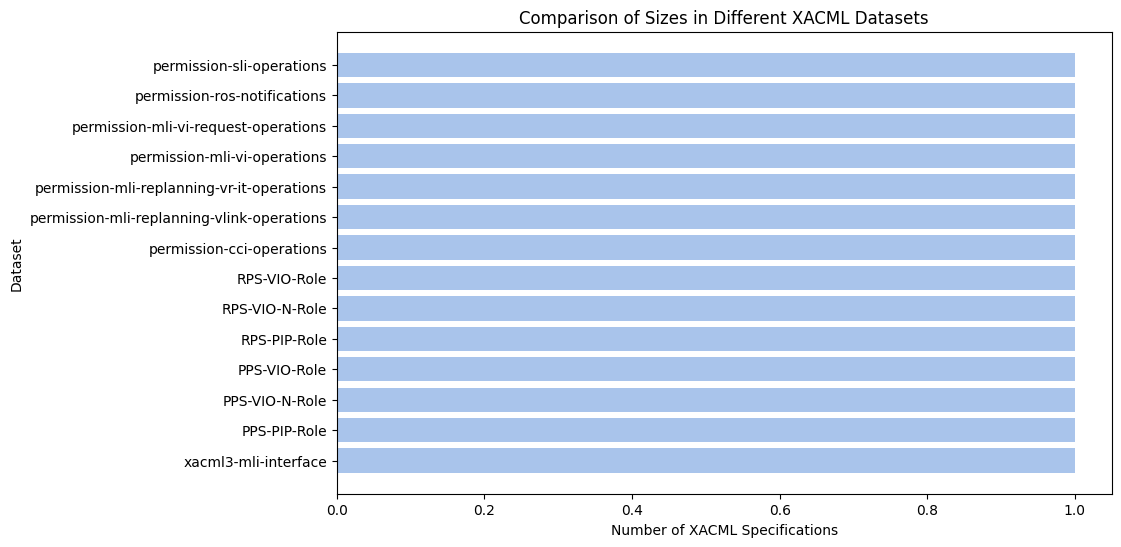

In [44]:
labels = [path.stem for path in xacml_paths]
sizes = []
for path in xacml_paths:
    df = pd.read_csv(path)
    sizes.append(df.shape[0])
plt.figure(figsize=(10, 6))
plt.barh(labels, sizes, color="#a9c4eb")
plt.ylabel("Dataset")
plt.xlabel("Number of XACML Specifications")
plt.title("Comparison of Sizes in Different XACML Datasets")


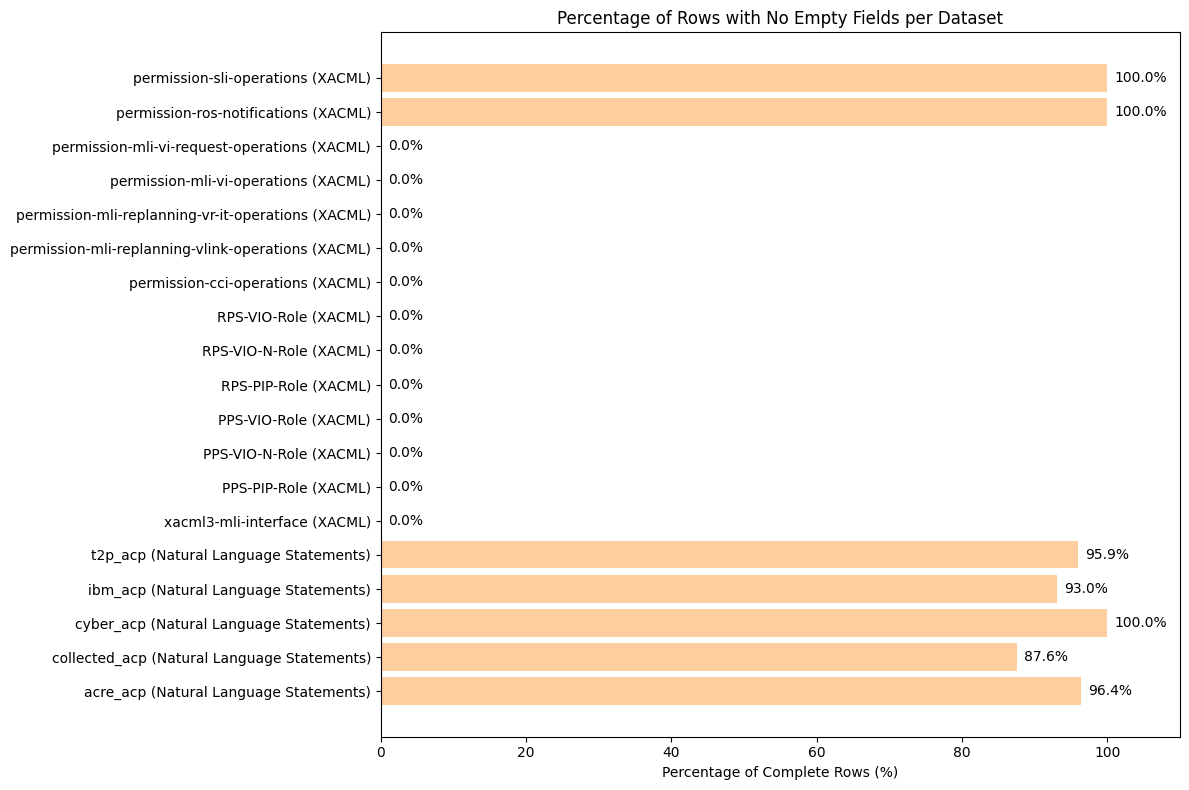

In [ ]:
data_completeness = []
dataset_names = []

# Process NL datasets
for path in nl_paths:
    df = pd.read_csv(path)
    # Calculate percentage of rows with no empty fields
    # dropna() removes rows with any missing values (NaN)
    complete_rows = df.dropna().shape[0]
    total_rows = df.shape[0]
    percentage = (complete_rows / total_rows * 100) if total_rows > 0 else 0
    data_completeness.append(percentage)
    dataset_names.append(path.stem + " (Natural Language Statements)")

# Process XACML datasets
for path in xacml_paths:
    df = pd.read_csv(path)
    complete_rows = df.dropna().shape[0]
    total_rows = df.shape[0]
    percentage = (complete_rows / total_rows * 100) if total_rows > 0 else 0
    data_completeness.append(percentage)
    dataset_names.append(path.stem + " (XACML)")

# Plotting
plt.figure(figsize=(12, 8))
y_pos = np.arange(len(dataset_names))
plt.barh(y_pos, data_completeness, align="center", color="#ffce9f")
plt.yticks(y_pos, dataset_names)
plt.xlabel("Percentage of Complete Rows (%)")
plt.title("Percentage of Rows with No Empty Fields per Dataset")
plt.xlim(0, 110)  # Extend a bit for labels

# Add percentage labels
for i, v in enumerate(data_completeness):
    plt.text(v + 1, i, f"{v:.1f}%", va="center")

plt.tight_layout()
plt.show()

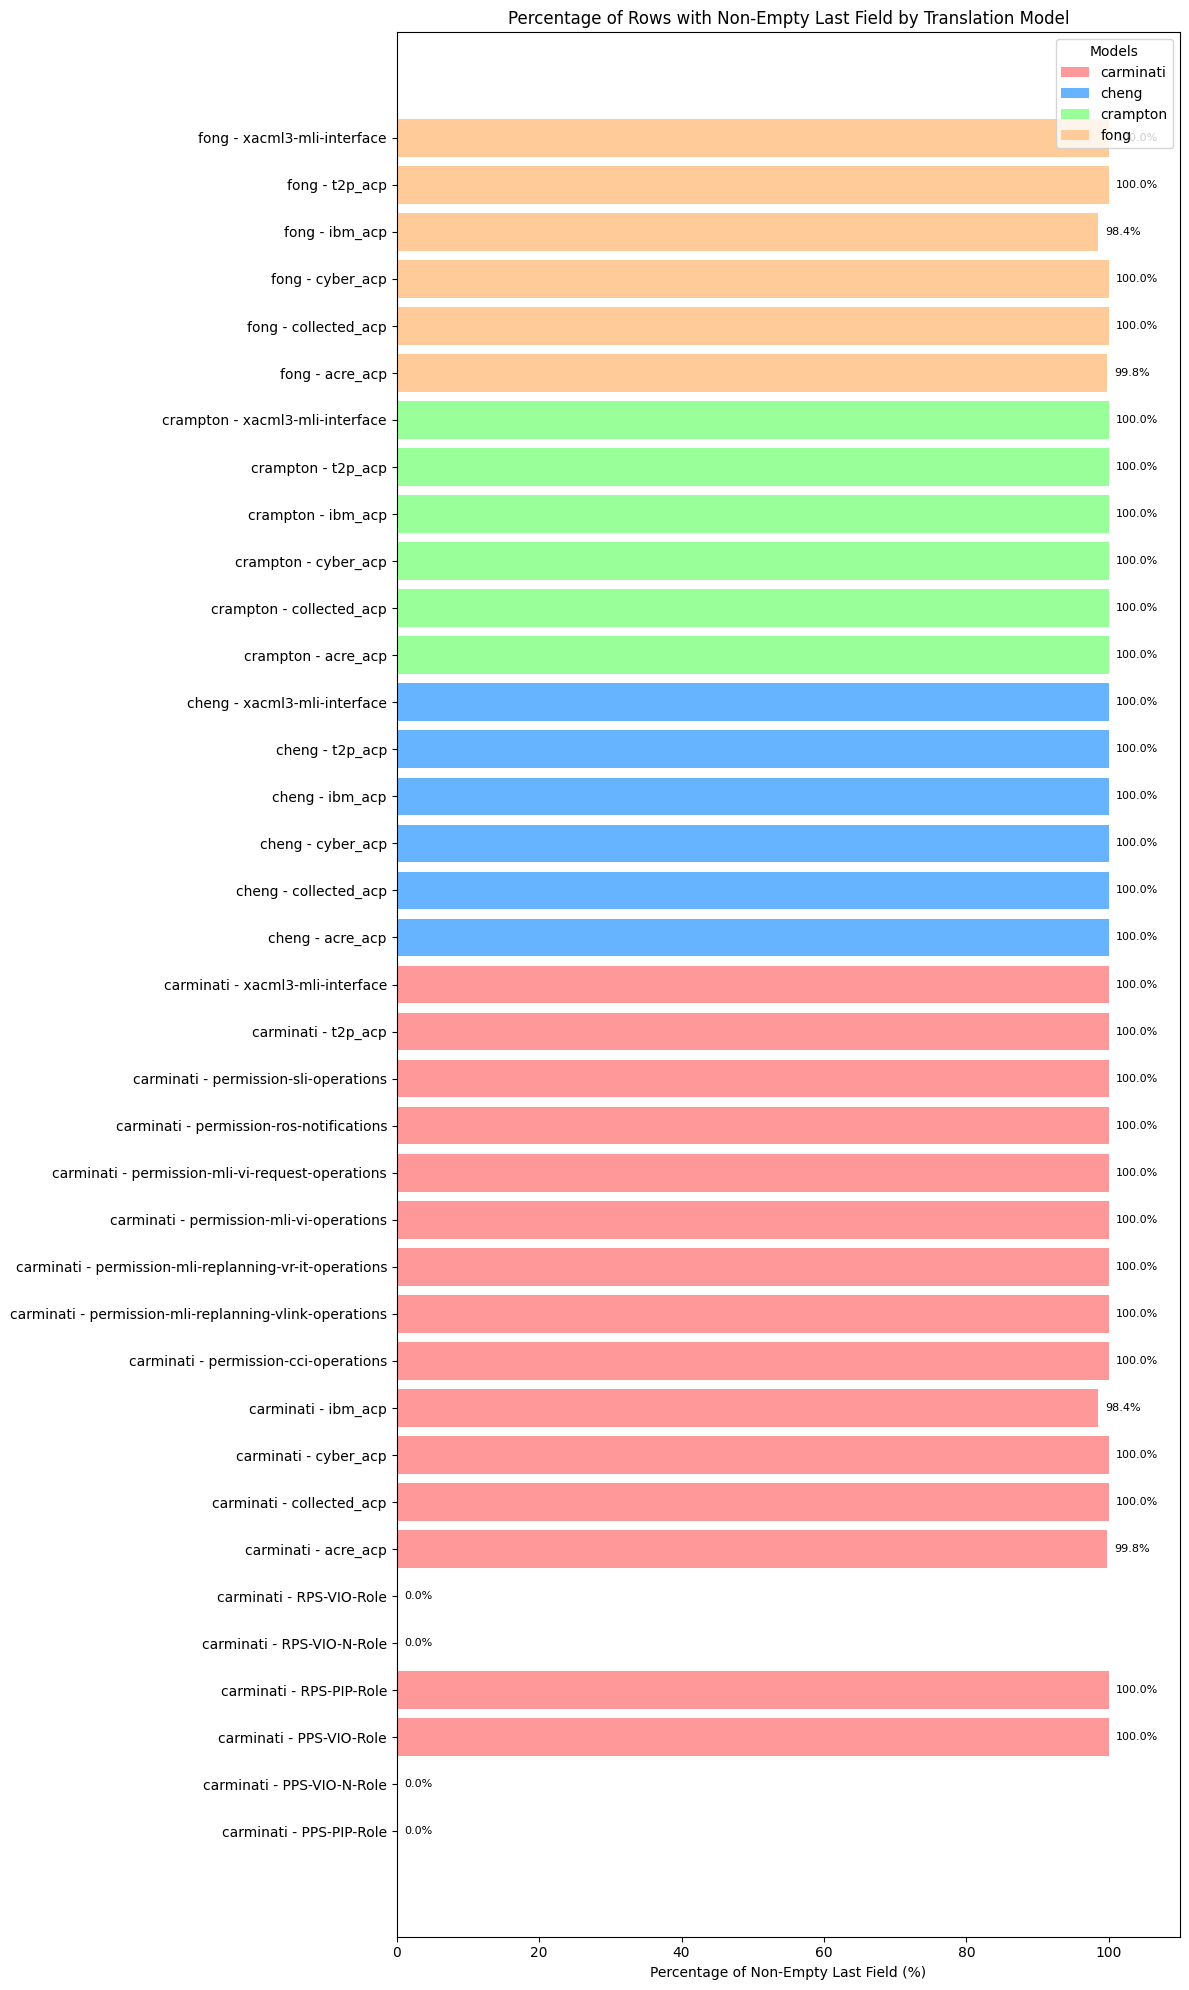

In [ ]:
# Translation Models Analysis
translation_root = Path("../policy_translation/output/")
models = ["carminati", "cheng", "crampton", "fong"]

translation_data = []
translation_labels = []
colors = []

model_colors = {
    "carminati": "#ff9999",
    "cheng": "#66b3ff",
    "crampton": "#99ff99",
    "fong": "#ffcc99",
}

for model in models:
    model_path = translation_root / model
    if model_path.exists():
        # Get all csv files in the directory
        csv_files = sorted(list(model_path.glob("*.csv")))

        for file_path in csv_files:
            try:
                df = pd.read_csv(file_path)
                if not df.empty and df.shape[1] > 0:
                    # Check last column for non-empty values
                    # count() returns number of non-NA/null observations
                    last_col = df.iloc[:, -1]
                    non_empty_count = last_col.count()
                    total_count = len(df)
                    percentage = (
                        (non_empty_count / total_count * 100) if total_count > 0 else 0
                    )

                    translation_data.append(percentage)
                    translation_labels.append(f"{model} - {file_path.stem}")
                    colors.append(model_colors.get(model, "#cccccc"))
            except Exception as e:
                print(f"Error processing {file_path}: {e}")

# Plotting
if translation_data:
    plt.figure(figsize=(12, 20))  # Taller figure for many bars
    y_pos = np.arange(len(translation_labels))
    plt.barh(y_pos, translation_data, align="center", color=colors)
    plt.yticks(y_pos, translation_labels)
    plt.xlabel("Percentage of Non-Empty Last Field (%)")
    plt.title("Percentage of Rows with Non-Empty Last Field by Translation Model")
    plt.xlim(0, 110)

    # Add percentage labels
    for i, v in enumerate(translation_data):
        plt.text(v + 1, i, f"{v:.1f}%", va="center", fontsize=8)

    # Create legend
    from matplotlib.patches import Patch

    legend_elements = [Patch(facecolor=model_colors[m], label=m) for m in models]
    plt.legend(handles=legend_elements, title="Models", loc="upper right")

    plt.tight_layout()
    plt.show()
else:
    print("No data found for translation models.")

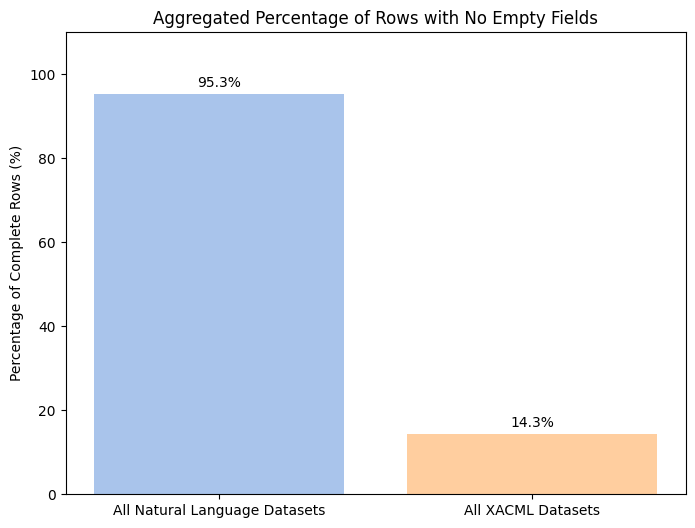

In [ ]:
# Aggregated Analysis for NL and XACML
aggregated_data = []
aggregated_labels = ["All Natural Language Datasets", "All XACML Datasets"]

# Aggregate NL
nl_dfs = []
for path in nl_paths:
    try:
        df = pd.read_csv(path)
        nl_dfs.append(df)
    except Exception as e:
        print(f"Error reading {path}: {e}")

if nl_dfs:
    # concat will align columns. If columns differ, NaNs will be introduced, which is correct for "completeness" check
    all_nl_df = pd.concat(nl_dfs, ignore_index=True)
    complete_rows = all_nl_df.dropna().shape[0]
    total_rows = all_nl_df.shape[0]
    nl_percentage = (complete_rows / total_rows * 100) if total_rows > 0 else 0
    aggregated_data.append(nl_percentage)
else:
    aggregated_data.append(0)

# Aggregate XACML
xacml_dfs = []
for path in xacml_paths:
    try:
        df = pd.read_csv(path)
        xacml_dfs.append(df)
    except Exception as e:
        print(f"Error reading {path}: {e}")

if xacml_dfs:
    all_xacml_df = pd.concat(xacml_dfs, ignore_index=True)
    complete_rows = all_xacml_df.dropna().shape[0]
    total_rows = all_xacml_df.shape[0]
    xacml_percentage = (complete_rows / total_rows * 100) if total_rows > 0 else 0
    aggregated_data.append(xacml_percentage)
else:
    aggregated_data.append(0)

# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(aggregated_labels, aggregated_data, color=["#a9c4eb", "#ffce9f"])
plt.ylabel("Percentage of Complete Rows (%)")
plt.title("Aggregated Percentage of Rows with No Empty Fields")
plt.ylim(0, 110)

# Add percentage labels
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height + 1,
        f"{height:.1f}%",
        ha="center",
        va="bottom",
    )

plt.show()

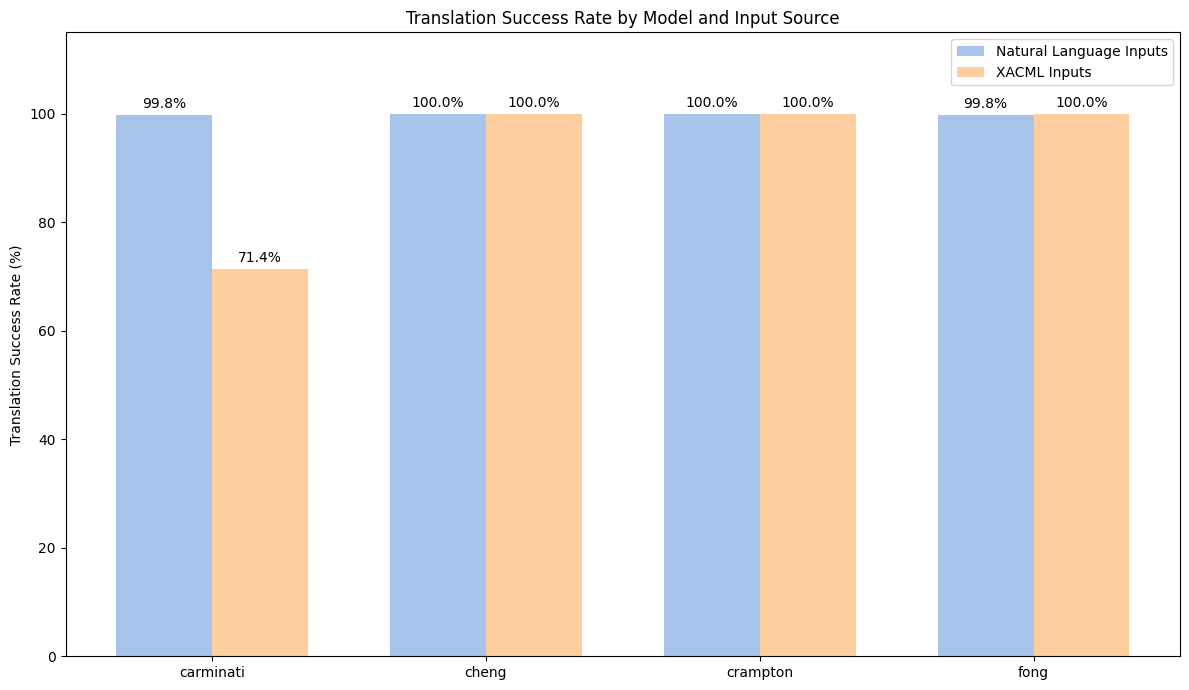

In [ ]:
# Aggregated Translation Success Rate by Model and Source
nl_stems = [p.stem for p in nl_paths]
xacml_stems = [p.stem for p in xacml_paths]

models = ["carminati", "cheng", "crampton", "fong"]
nl_rates = []
xacml_rates = []

for model in models:
    model_path = translation_root / model

    nl_total = 0
    nl_success = 0
    xacml_total = 0
    xacml_success = 0

    if model_path.exists():
        for file_path in model_path.glob("*.csv"):
            stem = file_path.stem
            try:
                df = pd.read_csv(file_path)
                if df.empty or df.shape[1] == 0:
                    continue

                total = len(df)
                # Success is defined as non-empty last column
                success = df.iloc[:, -1].count()

                if stem in nl_stems:
                    nl_total += total
                    nl_success += success
                elif stem in xacml_stems:
                    xacml_total += total
                    xacml_success += success
            except Exception as e:
                print(f"Error processing {file_path}: {e}")

    nl_rate = (nl_success / nl_total * 100) if nl_total > 0 else 0
    xacml_rate = (xacml_success / xacml_total * 100) if xacml_total > 0 else 0

    nl_rates.append(nl_rate)
    xacml_rates.append(xacml_rate)

# Plotting Grouped Bar Chart
x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 7))
rects1 = ax.bar(
    x - width / 2, nl_rates, width, label="Natural Language Inputs", color="#a9c4eb"
)
rects2 = ax.bar(
    x + width / 2, xacml_rates, width, label="XACML Inputs", color="#ffce9f"
)

ax.set_ylabel("Translation Success Rate (%)")
ax.set_title("Translation Success Rate by Model and Input Source")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.set_ylim(0, 115)  # More space for labels


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
            f"{height:.1f}%",
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 3),
            textcoords="offset points",
            ha="center",
            va="bottom",
        )


autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()